In [14]:
using CSV, DataFrames
df = CSV.read("../data/race_dataset.csv", DataFrame)

Row,box,odds,slit_score,horse
,Int64,Float64,Float64,String31
1,2,4.7,1.0,ブラウンラチェット
2,1,15.6,0.498544,ミストレス
3,8,4.1,0.498544,ショウナンザナドゥ
4,4,6.6,0.353499,シホリーン
5,3,6.3,0.296296,マイエレメント
6,10,3.1,0.245623,カムニャック
7,6,57.9,0.125,マピュース
8,11,79.9,0.0251356,クレオズニードル
9,5,13.4,0.00201291,ミリオンローズ


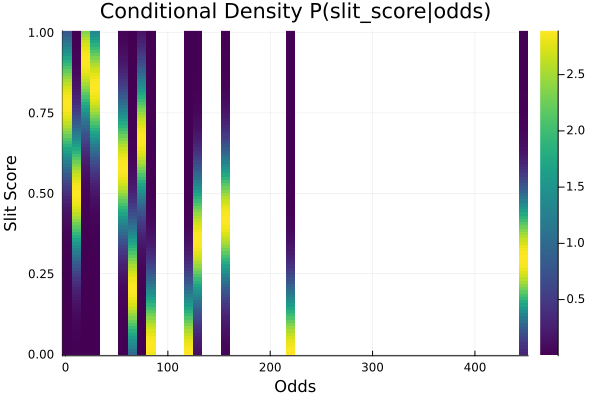

In [18]:
using CSV, DataFrames
using KernelDensity
using Plots


# 条件付きKDEの実装
function conditional_kde(x_target, x_values, y_values, bandwidth=0.1)
    # 重みの計算（カーネル関数としてガウシアンカーネルを使用）
    weights = exp.(-0.5 * ((x_values .- x_target) ./ bandwidth).^2)
    weights = weights ./ sum(weights)

    # 重み付きKDE
    kde_result = kde(y_values, weights=weights)
    return kde_result
end

# オッズの値のグリッドポイント
odds_grid = range(minimum(df.odds), maximum(df.odds), length=50)
slit_score_grid = range(0, 1, length=100)

# 各オッズに対する条件付き確率密度を計算
density_matrix = zeros(length(slit_score_grid), length(odds_grid))
for (i, odds) in enumerate(odds_grid)
    kde_result = conditional_kde(odds, df.odds, df.slit_score)
    density_matrix[:, i] = pdf(kde_result, slit_score_grid)
end

# ヒートマップでの可視化
heatmap(odds_grid, slit_score_grid, density_matrix,
    xlabel="Odds",
    ylabel="Slit Score",
    title="Conditional Density P(slit_score|odds)",
    color=:viridis
)